In [30]:
host = "https://lista.mercadolivre.com.br/geladeira#D[A:geladeira]"

In [18]:
import re
import requests
import bs4
import pandas as pd

In [62]:
response = requests.get(host).content

In [47]:
soup = bs4.BeautifulSoup(response, 'html.parser')

In [33]:
soup.title.text

'Geladeira | MercadoLivre \uf8ffüì¶'

In [34]:
container_item = soup.find_all('div', class_="ui-search-result__content-wrapper")

In [24]:
container_item[0].text

'RECOMENDADOGeladeira RE31 Cycle Defrost 240L branca Electrolux 127Vpor Mercado LivreR$2.399R$1.81824% OFFem10x R$181,80sem jurosCupom R$ 15 OFFFrete gr√°tisEnviado peloAvalia√ß√£o 4.8 de 5. 3,234 opini√µes.4.8(3234)Dispon√≠vel em 2 cores'

In [35]:
data = []

In [14]:
def add_product(texto):
    # Expressões regulares para extrair o título, preço e avaliação
    regex_preco = r'R\$(\d+\.?\d*)'

    # Encontrar correspondências usando regex
    titulo = texto.split('por ')[0]
    preco = re.search(regex_preco, texto).group(1)
    try:
        avaliacao =  re.search(r'\((\d+)\)', texto).group(1)
        avaliacao = avaliacao.replace('(', '').replace(')', '')
    except:
        avaliacao = 0


    return {
        'title': titulo,
        'price': float(preco),
        'assessment': int(avaliacao)
    }


In [36]:
for item in container_item:

    data.append(add_product(item.text))

In [67]:
df = pd.DataFrame(data)
df

,title,price,assessment
0,RECOMENDADOGeladeira RE31 Cycle Defrost 240L b...,2.399,3234
1,MAIS VENDIDOGeladeira Consul CRD37 branca com ...,2.599,1963
2,RECOMENDADOGeladeira Electrolux DC35 260L Com ...,3.152,2459
3,Geladeira Electrolux Cycle Defrost 240L Degelo...,2.049,3234
4,Geladeira Frost Free Duplex 386 Litros Crm44ab...,3.783,895
5,Geladeira frost free Consul CRM39A branca com ...,2.789,2888
6,Geladeira Electrolux DC35 branca com freezer 2...,2.223,2459
7,Geladeira Consul CRD37 branca com freezer 334L...,2.599,1963
8,OFERTA DO DIAGeladeira Bb41 Black Glass 397l A...,4.814,63
9,Geladeira Brastemp Frost Free Inverse 588 Litr...,9.327,657


In [68]:
df = df.query('assessment >= 1000')

In [71]:
df = df.query('price >= 1.000')
df.count()

title         14
price         14
assessment    14
dtype: int64

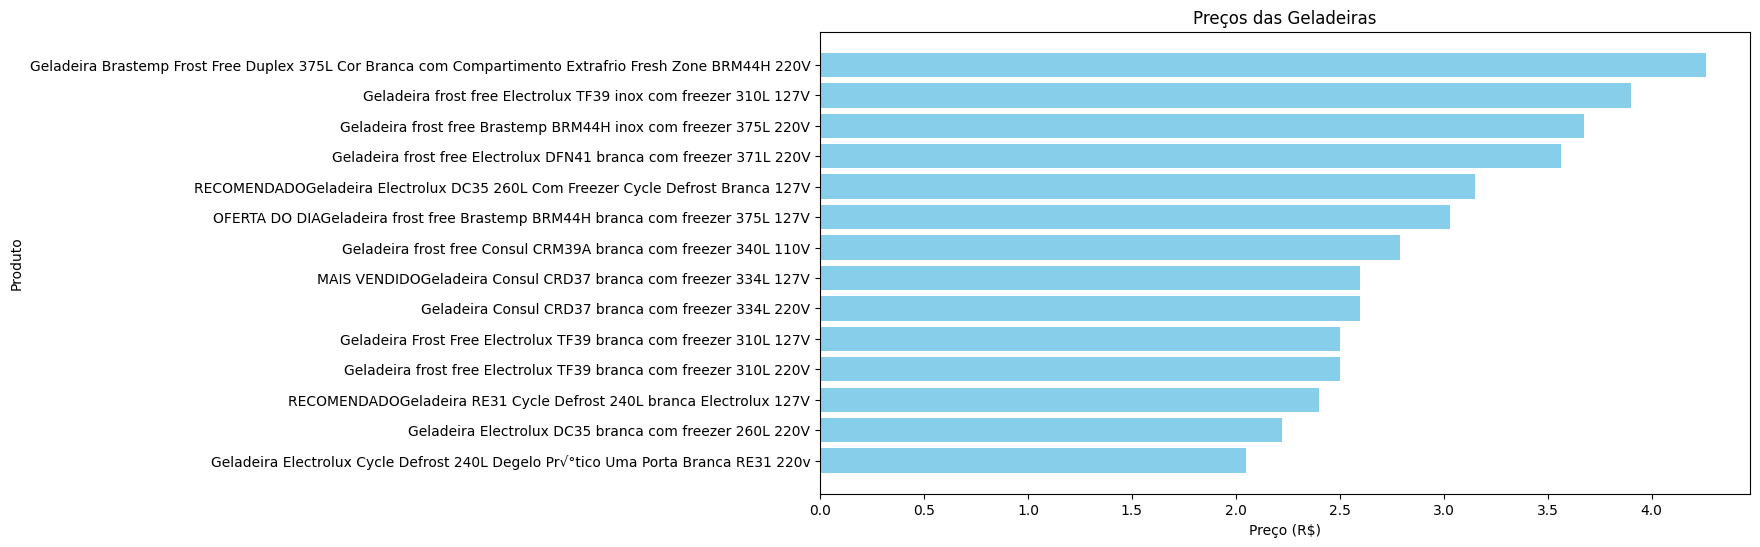

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df = df.sort_values(by='price', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(df['title'], df['price'], color='skyblue')
plt.xlabel('Preço (R$)')
plt.ylabel('Produto')
plt.title('Preços das Geladeiras')
plt.gca().invert_yaxis()  # Inverter a ordem dos itens para o mais caro aparecer primeiro
plt.show()